In [1]:
import nibabel as ni
from nilearn import input_data,plotting
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/data1/home/nsharif/code/py27/local/lib/python2.7/site-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/data1/home/nsharif/code/py27/local/lib/python2.7/site-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/data1/home/nsharif/code/py27/local/lib/python2.7/site-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p


ImportError: No module named nilearn

In [2]:
image_fldat = ni.load('/Users/nalsharif/science/PING_niak/test_subjs/data/flip/sub-P0128/func/sub-P0128_task-rest_bold.nii.gz'
               ).get_data()
image_nofldat = ni.load('/Users/nalsharif/science/PING_niak/test_subjs/data/no_flip/sub-P0161/func/sub-P0161_task-rest_bold.nii.gz'
                    ).get_data()

In [30]:
image_fl = ni.load('/Users/nalsharif/science/PING_niak/test_subjs/data/flip/sub-P0128/func/sub-P0128_task-rest_bold.nii.gz'
               )
image_nofl = ni.load('/Users/nalsharif/science/PING_niak/test_subjs/data/no_flip/sub-P0161/func/sub-P0161_task-rest_bold.nii.gz'
                    )

In [20]:
image_nofl.shape

(96, 96, 47, 156)

In [21]:
image_fl[32,21,13,0]

35

/Users/nalsharif/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


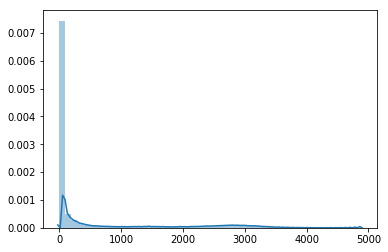

In [39]:
plt.close()
sns.distplot(image_fldat[:,:,:,0].flat)
plt.show()


In [40]:
ici = np.where(image_fldat[:,:,:,0]>200)

In [76]:
len(image_fldat[:,:,:,0][image_fldat[:,:,:,0]<200]) / len(image_fldat[:,:,:,0].flat)

0.7746322307180851

In [41]:
ici

(array([ 9,  9,  9, ..., 53, 53, 53]),
 array([36, 36, 37, ..., 38, 38, 41]),
 array([21, 22, 21, ..., 25, 26, 22]))

In [43]:
mask = np.zeros_like(image_fldat[:,:,:,0])
mask[ici] = 1

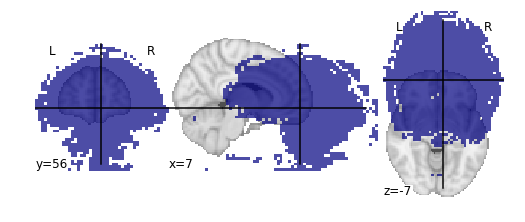

In [44]:
plt.close()
plotting.plot_roi(ni.Nifti1Image(mask,image_fl.affine))
plt.show()

In [45]:
sl2 = image_fldat[:,:,:,1][ici].mean()
sl3 = image_fldat[:,:,:,2][ici].mean()

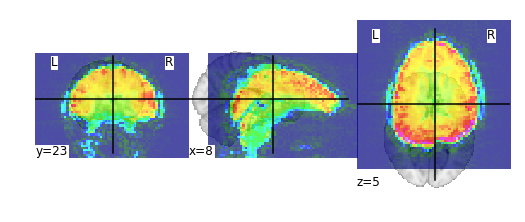

In [51]:
plt.close()
plotting.plot_roi(ni.Nifti1Image(image_fldat[:,:,:,1],image_fl.affine))
plt.show()

In [64]:
means_fl = []

for i in range(image_fldat.shape[3]):
    slc = image_fldat[:,:,:,i][ici].mean()
    means_fl.append(slc)
    
pdiff_fl = []

for m in means_fl:
    p = abs(m-means_fl)/means_fl
    pdiff_fl.append(p)

In [65]:
means_nofl = []

for i in range(image_nofldat.shape[3]):
    slc = image_nofldat[:,:,:,i][ici].mean()
    means_nofl.append(slc)
    
pdiff_nofl = []

for m in means_nofl:
    p = abs(m-means_nofl)/means_nofl
    pdiff_nofl.append(p)

In [69]:
np.mean(pdiff_nofl)

0.0035891786354349717

In [70]:
np.mean(pdiff_fl)

0.1295784032086382

# here is where you figured stuff out

In [4]:
import nibabel as ni
from glob import glob
import numpy as np
import pandas as pd
import os

# for the graphical stuff
from nilearn import input_data,plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def find_pdiff(img_path):
    
    image = ni.load(img_path).get_data()
    
    vol0 = image[:,:,:,0]
    
    sorted_vol = sorted(vol0.flat)
    thr = int(len(sorted_vol)*0.75)
    mask_vol = np.where(image[:,:,:,0]>sorted_vol[thr])

    means = []
    for i in range(image.shape[3]):
        slc = image[:,:,:,i][mask_vol].mean()
        means.append(slc)

    pdiff = []
    for m in means:
        p = abs(m-means)/means
        pdiff.append(p)
        
    return np.mean(pdiff)


    

In [12]:
find_pdiff('/home/users/nsharif/ace_mount/ace_home/PING/niak/P0883/func/P0883_v1_fmri_BOLD_13.nii.gz')

0.004393695271313231

In [30]:
subjs = glob('/home/users/nsharif/ace_mount/ace_home/PING/niak/test_find_flip/P*/func/P*_v1_fmri_rest.nii.gz')

In [31]:
sort_subjs = sorted(subjs)

In [32]:
test_df = pd.DataFrame(index = range(len(sort_subjs)))

In [33]:
test_df.loc[:,'paths'] = sort_subjs

In [34]:
test_df.loc[:,'label'] = [0 if x > 9 else 1 for x in range(20)]

In [35]:
test_df

,paths,label
0,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1
1,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1
2,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1
3,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1
4,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1
5,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1
6,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1
7,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1
8,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1
9,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1


In [139]:

for i in range(len(sorted(sort_subjs))):
    try: 
        df.loc[i,'pdiff mean'] = find_pdiff(df.loc[i,'paths'])
    except:
        print(sort_subjs[i])
        

In [140]:
df

,paths,label,pdiff mean
0,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1,0.104764
1,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1,0.121466
2,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1,0.085963
3,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1,0.074318
4,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1,0.087186
5,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1,0.063250
6,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1,0.074937
7,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1,0.053748
8,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1,0.101407
9,/home/users/nsharif/ace_mount/ace_home/PING/ni...,1,0.060399


In [141]:
df.to_csv('/home/users/nsharif/ace_mount/ace_home/PING/niak/flip/flip_df.csv')

In [25]:
from sklearn import linear_model, model_selection

In [62]:
indices = model_selection.StratifiedShuffleSplit(n_splits=1,test_size=0.5,random_state=19
                                                ).split(test_df.index,test_df.label)
tr_id, te_id = [],[]
for x,y in indices:
    tr_id.append(x)
    te_id.append(y)
tr = test_df.loc[tr_id[0]]
te = test_df.loc[te_id[0]]

In [78]:
from nilearn import datasets

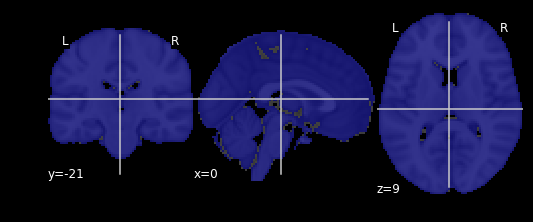

In [103]:
dat = mni.get_data()
msk = np.zeros_like(dat)
msk[dat>3000] = 1
msk_img = ni.Nifti1Image(msk,mni.affine)
plotting.plot_roi(msk_img, mni)

In [101]:
from nilearn import input_data

In [109]:
X = np.zeros((len(msk[msk==1])*2,len(tr)))
for i,pth in enumerate(tr.paths.values):
    img = ni.load(pth)
    resampled = image.resample_to_img(img,mni,interpolation='nearest')
    first_two_frames = ni.Nifti1Image(resampled.get_data()[:,:,:,:2], resampled.affine)
    array = input_data.NiftiMasker(msk_img).fit_transform(first_two_frames).flatten()
    X[:,i] = array
    print('finished',i)

finished 0
finished 1
finished 2
finished 3
finished 4
finished 5
finished 6
finished 7
finished 8
finished 9


In [110]:
X2 = np.zeros((len(msk[msk==1])*2,len(tr)))
for i,pth in enumerate(te.paths.values):
    img = ni.load(pth)
    resampled = image.resample_to_img(img,mni,interpolation='nearest')
    first_two_frames = ni.Nifti1Image(resampled.get_data()[:,:,:,:2], resampled.affine)
    array = input_data.NiftiMasker(msk_img).fit_transform(first_two_frames).flatten()
    X2[:,i] = array
    print('finished',i)

finished 0
finished 1
finished 2
finished 3
finished 4
finished 5
finished 6
finished 7
finished 8
finished 9


In [112]:
mod = svm.SVC()
fitted = mod.fit(X.T, tr.label.values)

In [113]:
fitted.score(X.T, tr.label.values)

1.0

In [114]:
fitted.score(X2.T, te.label.values)

0.5

In [89]:
resampled.get_data()[:,:,:,:2].flatten()

array([0., 0., 0., ..., 0., 0., 0.])

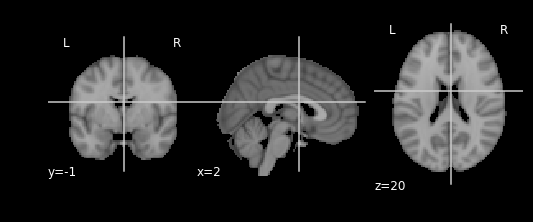

In [83]:
mni = ni.load(datasets.MNI152_FILE_PATH)
plotting.plot_anat(mni)

In [75]:
from nilearn import image
catch = []
x,y,z = ni.load(tr.paths.values[0]).shape
for i in tr.paths.values:
    ni.load(i).get_data()
    
tr_imgs = image.load_img(tr.paths.values.tolist())
te_imgs = image.load_img(te.paths.values.tolist())

ValueError: Field of view of image #1 is different from reference FOV.
Reference affine:
array([[-2.66024923e+00,  1.21839851e-01,  1.56452850e-01,
         1.18118637e+02],
       [ 1.21075772e-01,  2.66385746e+00, -1.99991856e-02,
        -1.30634445e+02],
       [ 1.39735013e-01,  1.14200627e-02,  2.99584937e+00,
        -6.06556168e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])
Image affine:
array([[-2.66546345e+00, -7.49296546e-02, -3.18576545e-02,
         1.32192215e+02],
       [-7.69639835e-02,  2.65695095e+00,  2.40759462e-01,
        -1.21998520e+02],
       [-2.22014003e-02, -2.14729130e-01,  2.99015403e+00,
        -1.93685246e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])
Reference shape:
(96, 96, 47)
Image shape:
(96, 96, 47, 156)


In [71]:
from sklearn import svm

In [72]:
svm.SVC?

In [ ]:
tr,te = model_selection.StratifiedShuffleSplit(n_splits=2,test_size=0.5,random_state=19).split

In [27]:
tr, te = model_selection.train_test_split(df, test_size=0.5)

In [123]:
logm = linear_model.LogisticRegressionCV().fit(tr.loc[:,'pdiff mean'].values.reshape(-1,1),tr.loc[:,'label'])

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [119]:
logm.score(te.loc[:,'pdiff mean'].values.reshape(-1,1),te.loc[:,'label'])

1.0

In [133]:
logm.predict(np.array([0.01, 0.002, 0.23, 0.04]).reshape(-1,1))

array([0, 0, 1, 1])

/Users/nalsharif/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


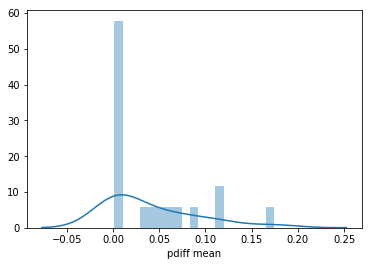

In [129]:
plt.close()
sns.distplot(df['pdiff mean'],bins=19)
plt.show()

In [6]:
findflip_df = pd.read_csv('/Users/nalsharif/science/PING_niak/2flip.csv')

/Users/nalsharif/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


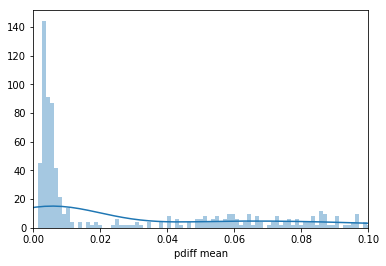

In [25]:
plt.close()
sns.distplot(findflip_df['pdiff mean'], bins=200)
plt.xlim(0,0.10)
plt.show()

In [13]:
findflip_df.drop(columns="Unnamed: 0",inplace=True)

In [27]:
findflip_df[(findflip_df["pdiff mean"]<0.04) & (findflip_df["pdiff mean"]>0.02)].sort_values("pdiff mean")["paths"].tolist()

['/home/users/nsharif/ace_mount/ace_home/PING/niak/p0952/func/p0952_20110315_153616_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p1017/func/p1017_20110630_094901_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p0434/func/p0434_20100902_092443_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p0067/func/p0067_20101020_162801_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p0709/func/p0709_20110113_173906_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p1680/func/p1680_20120722_110800_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p0878/func/p0878_20110226_140839_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p0209/func/p0209_20100717_131321_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p0251/func/p0251_20100825_111217_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p0604/func/p0604_20101106_114841_fmri.nii.gz',
 '/home/users/nshari

In [32]:
findflip_df[findflip_df["paths"] == '/home/users/nsharif/ace_mount/ace_home/PING/niak/p0067/func/p0067_20101020_162801_fmri.nii.gz']

,paths,pdiff mean
405,/home/users/nsharif/ace_mount/ace_home/PING/ni...,0.025168


In [36]:
noflip_df = findflip_df[(findflip_df["pdiff mean"]<0.025168)]
flip_df = findflip_df[(findflip_df["pdiff mean"]>=0.025168)]

In [42]:
noflip_df["paths"].tolist()

['/home/users/nsharif/ace_mount/ace_home/PING/niak/p0171/func/p0171_20100809_100152_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p1028/func/p1028_20110426_160819_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p1670/func/p1670_20120612_152718_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p1619/func/p1619_20120515_155610_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p1071/func/p1071_20110406_190330_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p0875/func/p0875_20110210_151419_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p0163/func/p0163_20100602_164722_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p1284/func/p1284_20110808_160907_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p0942/func/p0942_20110330_160310_fmri.nii.gz',
 '/home/users/nsharif/ace_mount/ace_home/PING/niak/p0801/func/p0801_20110124_084414_fmri.nii.gz',
 '/home/users/nshari

In [43]:
len(noflip_df)

243